In [311]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# 서울면적 605.7 제곱킬로
# 대전면적 117 제곱킬로
# 서울시 한 구가 평균적으로 20-30 제곱킬로
# '구'당 대규모 점포수로만 비교했을 때 대전이 서울에 비해 확실히 부족. 최소 1/2-1/3 수준 

In [314]:
rent_seoul = pd.read_csv('/home/subin/다운로드/팩터 논문/서울특별시_전월세가_2022.csv', encoding='cp949')
rent_seoul
# 서울특별시
# '임대료(만원)'이 '0'인 행 : 전세 데이터
# 전세 데이터로 cap rate 구하려면 금리 데이터 필요 -> 복잡해질 것을 우려하여, 월세 데이터에 충분한 양의 아파트 데이터가 있는지 확인

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,계약일,전월세구분,임대면적,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
0,2022,11560,영등포구,12600,양평동2가,1.0,대지,1.0,3.0,6.0,20220101,전세,18.84,16000,0,힘멜하임,2014.0,오피스텔,22.01~24.01,신규,NaN,0.0,NaN
1,2022,11560,영등포구,11800,도림동,NaN,NaN,NaN,NaN,NaN,20220101,월세,20.00,300,30,NaN,1986.0,단독다가구,NaN,NaN,NaN,NaN,NaN
2,2022,11215,광진구,10700,화양동,1.0,대지,111.0,12.0,19.0,20220101,월세,27.82,10000,135,NaN,2021.0,오피스텔,22.01~24.01,신규,NaN,0.0,0.0
3,2022,11620,관악구,10100,봉천동,NaN,NaN,NaN,NaN,NaN,20220101,월세,18.50,4000,40,NaN,2019.0,단독다가구,22.02~23.02,신규,NaN,0.0,0.0
4,2022,11620,관악구,10100,봉천동,NaN,NaN,NaN,NaN,NaN,20220101,전세,14.00,13000,0,NaN,2019.0,단독다가구,22.01~24.01,신규,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560660,2022,11230,동대문구,10200,용두동,NaN,NaN,NaN,NaN,NaN,20221231,월세,43.00,17000,25,NaN,2015.0,단독다가구,23.01~25.01,신규,NaN,0.0,0.0
560661,2023,11560,영등포구,13200,신길동,NaN,NaN,NaN,NaN,NaN,20221231,월세,37.00,1000,33,NaN,1990.0,단독다가구,23.01~25.01,신규,NaN,0.0,0.0
560662,2023,11530,구로구,10700,개봉동,NaN,NaN,NaN,NaN,NaN,20221231,전세,37.00,8500,0,NaN,1997.0,단독다가구,NaN,NaN,NaN,NaN,NaN
560663,2023,11290,성북구,13300,정릉동,NaN,NaN,NaN,NaN,NaN,20221231,월세,63.57,5000,60,NaN,1997.0,단독다가구,NaN,NaN,NaN,NaN,NaN


In [315]:
rent_seoul_monthly = rent_seoul[rent_seoul['임대료(만원)']!=0]
rent_seoul_jeonsae = rent_seoul[rent_seoul['임대료(만원)']==0]

In [209]:
rent_seoul_monthly['건물용도'].value_counts()

단독다가구    107067
아파트       93071
연립다세대     46550
오피스텔      33961
Name: 건물용도, dtype: int64

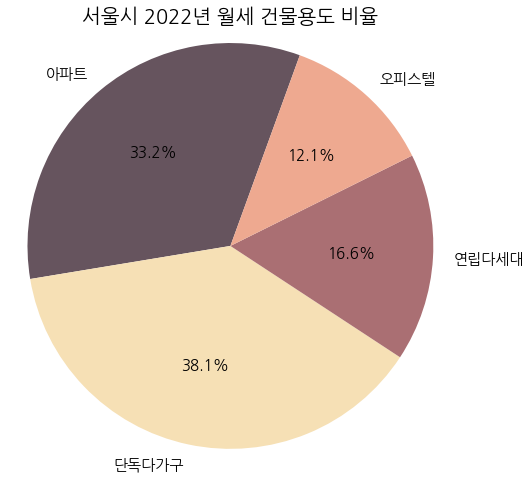

In [339]:
custom_order = ['아파트', '단독다가구', '연립다세대', '오피스텔']
value_counts = rent_seoul_monthly['건물용도'].value_counts().reindex(custom_order)

# Step 2: Create a pie chart using matplotlib
plt.figure(figsize=(8, 8))  # Optional: Set the size of the pie chart
custom_colors = ['#66545e', '#f6e0b5', '#aa6f73', '#eea990', '#a39193']
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=70, colors=custom_colors)

# Optional: Add a title to the pie chart
plt.title('서울시 2022년 월세 건물용도 비율', fontsize=20)

# Optional: Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.rc('font', family='NanumGothic')
# Show the pie chart
plt.show()

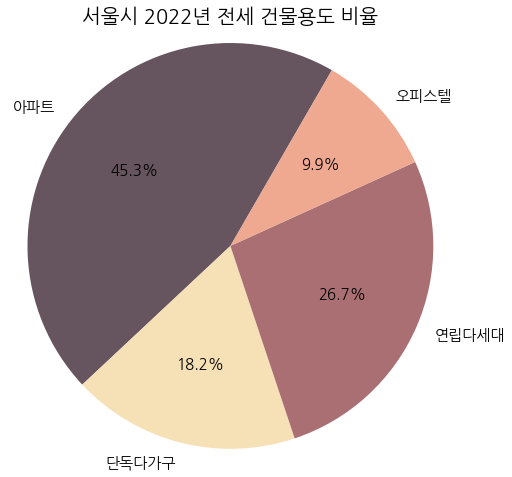

In [340]:
custom_order = ['아파트', '단독다가구', '연립다세대', '오피스텔']
value_counts = rent_seoul_jeonsae['건물용도'].value_counts().reindex(custom_order)

# Step 2: Create a pie chart using matplotlib
plt.figure(figsize=(8, 8))  # Optional: Set the size of the pie chart
custom_colors = ['#66545e', '#f6e0b5', '#aa6f73', '#eea990', '#a39193']
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=60, colors=custom_colors)

# Optional: Add a title to the pie chart
plt.title('서울시 2022년 전세 건물용도 비율', fontsize=20)

# Optional: Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.rc('font', family='NanumGothic')
# Show the pie chart
plt.show()

In [210]:
rent_seoul_jeonsae['건물용도'].value_counts()
# 확실히 아파트가 전세 데이터가 많으나 93,071개면 데이터 수 확보는 괜찮은 것으로 판단.
# 아파트 종류, 지역이 다른지 추가 확인 -> 이 정도 분포면 괜찮다고 판단(아래에서 확인)

아파트      126877
연립다세대     74652
단독다가구     50832
오피스텔      27655
Name: 건물용도, dtype: int64

In [211]:
rent_seoul_monthly['자치구명'].value_counts()

송파구    24329
관악구    21551
강남구    18664
강서구    15476
마포구    15245
       ...  
금천구     6140
강북구     5676
도봉구     5373
종로구     4198
중구      4106
Name: 자치구명, Length: 25, dtype: int64

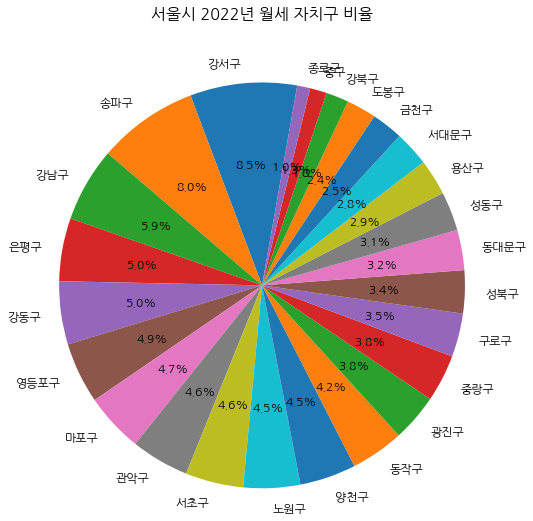

In [373]:
value_counts = rent_seoul_jeonsae['자치구명'].value_counts()

plt.figure(figsize=(8, 8))  # Optional: Set the size of the pie chart

# Custom colors for the pie chart

plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=80)

# Optional: Add a title to the pie chart
plt.title('서울시 2022년 월세 자치구 비율', fontsize=16, y=1.1)

# Setting font size for labels and percentage labels
plt.rc('font', size=12)

# Optional: Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the pie chart
plt.show()


In [212]:
rent_seoul_monthly['건물명'].value_counts()

센트레빌레우스1단지       1326
헬리오시티             737
파크리오              619
리센츠               615
용산원효루미니           576
                 ... 
(537-2)             1
(92-33)             1
(252-23)            1
성영빌라트               1
에이치비골드빌(102동)       1
Name: 건물명, Length: 27255, dtype: int64

In [213]:
rent_seoul_jeonsae['건물명'].value_counts()

현대                945
두산                722
신동아               718
우성                572
파크리오              562
                 ... 
뷰리치빌리지              1
천우빌라다동              1
테크노빌                1
진영아트빌(1016-31)      1
수유역투웨니퍼스트           1
Name: 건물명, Length: 34350, dtype: int64

In [214]:
rent_seoul_monthly
# 실거래가 데이터와 '건물명'으로 맵핑할 수 있으므로 결측치를 가지는 경우 삭제
# 건물용도 아파트만 살펴보기

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,계약일,전월세구분,임대면적,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
1,2022,11560,영등포구,11800,도림동,NaN,NaN,NaN,NaN,NaN,20220101,월세,20.00,300,30,NaN,1986.0,단독다가구,NaN,NaN,NaN,NaN,NaN
2,2022,11215,광진구,10700,화양동,1.0,대지,111.0,12.0,19.0,20220101,월세,27.82,10000,135,NaN,2021.0,오피스텔,22.01~24.01,신규,NaN,0.0,0.0
3,2022,11620,관악구,10100,봉천동,NaN,NaN,NaN,NaN,NaN,20220101,월세,18.50,4000,40,NaN,2019.0,단독다가구,22.02~23.02,신규,NaN,0.0,0.0
5,2022,11620,관악구,10100,봉천동,NaN,NaN,NaN,NaN,NaN,20220101,월세,15.96,12500,6,NaN,2018.0,단독다가구,22.01~24.01,신규,NaN,0.0,0.0
6,2022,11140,중구,16200,신당동,NaN,NaN,NaN,NaN,NaN,20220101,월세,15.00,500,40,NaN,1943.0,단독다가구,22.01~24.01,신규,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560658,2023,11680,강남구,10500,삼성동,NaN,NaN,NaN,NaN,NaN,20221231,월세,57.00,10000,95,NaN,1992.0,단독다가구,22.12~24.12,갱신,NaN,10000.0,63.0
560660,2022,11230,동대문구,10200,용두동,NaN,NaN,NaN,NaN,NaN,20221231,월세,43.00,17000,25,NaN,2015.0,단독다가구,23.01~25.01,신규,NaN,0.0,0.0
560661,2023,11560,영등포구,13200,신길동,NaN,NaN,NaN,NaN,NaN,20221231,월세,37.00,1000,33,NaN,1990.0,단독다가구,23.01~25.01,신규,NaN,0.0,0.0
560663,2023,11290,성북구,13300,정릉동,NaN,NaN,NaN,NaN,NaN,20221231,월세,63.57,5000,60,NaN,1997.0,단독다가구,NaN,NaN,NaN,NaN,NaN


In [215]:
rent_seoul_monthly = rent_seoul_monthly[rent_seoul_monthly['건물용도']=='아파트']
rent_seoul_monthly

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,계약일,전월세구분,임대면적,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
74,2022,11440,마포구,10200,공덕동,1.0,대지,43.0,0.0,14.0,20220101,월세,59.97,0,100,공덕2삼성래미안,2004.0,아파트,22.01~23.12,신규,NaN,0.0,0.0
102,2022,11215,광진구,10700,화양동,1.0,대지,113.0,1.0,10.0,20220101,월세,16.53,1000,65,광진코지웰,2014.0,아파트,22.02~24.02,신규,NaN,0.0,0.0
104,2022,11710,송파구,10300,풍납동,1.0,대지,514.0,0.0,27.0,20220101,월세,75.99,65000,34,잠실올림픽공원아이파크,2019.0,아파트,22.01~24.01,갱신,NaN,55000.0,50.0
106,2022,11305,강북구,10200,번동,1.0,대지,242.0,0.0,3.0,20220101,월세,41.30,2000,56,주공1단지,1991.0,아파트,22.01~24.01,신규,NaN,0.0,0.0
118,2022,11215,광진구,10500,자양동,1.0,대지,855.0,0.0,15.0,20220101,월세,84.96,10000,200,이튼타워리버3차,2007.0,아파트,22.01~22.12,신규,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560617,2023,11650,서초구,10800,서초동,1.0,대지,1334.0,1.0,6.0,20221231,월세,144.41,35000,120,신동아아파트(2차),1979.0,아파트,23.02~25.02,갱신,○,40000.0,120.0
560619,2023,11680,강남구,10100,역삼동,1.0,대지,712.0,5.0,6.0,20221231,월세,19.86,2000,150,역삼센트럴2차아이파크,2022.0,아파트,22.12~23.12,신규,NaN,0.0,0.0
560621,2023,11560,영등포구,10900,영등포동8가,1.0,대지,51.0,1.0,16.0,20221231,월세,12.11,500,55,영등포메이준2011,2012.0,아파트,23.01~24.01,신규,NaN,0.0,0.0
560641,2023,11710,송파구,10900,장지동,1.0,대지,854.0,0.0,11.0,20221231,월세,84.94,10000,190,송파파인타운11단지,2007.0,아파트,23.02~25.02,신규,NaN,0.0,0.0


In [216]:
rent_seoul_monthly.isnull().sum()
# 층, 임대료, 건물명 결측치 없음

접수년도           0
자치구코드          0
자치구명           0
법정동코드          0
법정동명           0
           ...  
계약기간       30374
신규계약구분     24167
갱신청구권사용    82893
종전보증금      24167
종전임대료      24167
Length: 23, dtype: int64

In [260]:
# 실거래가 데이터

actualPrice = pd.read_csv('/home/subin/다운로드/여피/0315 업무/trade_history_2018-2023_edit.csv', header=None)
actualPrice.columns = ['old_addr_idx', '거래날짜', '거래가격', '임대면적', '층', '알수없음_1', '거래방식', '알수없음_2', '알수없음_3', '시군구', '번지', '읍면동', '건물명', '세대수', '건축연도', '건물종류']
actualPrice['임대면적'] = actualPrice['임대면적'].round(2)
actualPrice['시도1'] = actualPrice['시군구'].str.split().str[0]
actualPrice['시군구1'] = actualPrice['시군구'].str.split().str[1]
actualPrice['시도2'] = actualPrice['시군구'].str.split().str[2]
actualPrice['시군구2'] = actualPrice['시군구'].str.split().str[3]
actualPrice

<ipython-input-260-d14b96b07acd>:3: DtypeWarning: Columns (5,6,8,9,10,11,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  actualPrice = pd.read_csv('/home/subin/다운로드/여피/0315 업무/trade_history_2018-2023_edit.csv', header=None)


,old_addr_idx,거래날짜,거래가격,임대면적,층,알수없음_1,거래방식,알수없음_2,알수없음_3,시군구,번지,읍면동,건물명,세대수,건축연도,건물종류,시도1,시군구1,시도2,시군구2
0,3023010200_00034_00000_apartment,2020-02-28,99000000,59.04,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3023010200_00027_00007_apartment,2020-02-03,70000000,56.26,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3023010200_00027_00007_apartment,2020-03-22,66000000,56.26,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3023010200_00027_00007_apartment,2020-04-29,77000000,56.26,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3023010200_00027_00007_apartment,2020-05-25,70000000,56.26,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206971,NaN,2022-08-20,209000000,19.13,11,NaN,중개거래,NaN,NaN,서울 송파구,41-1,방이동,잠실파크웨이,11710.0,2019.0,officetel,서울,송파구,NaN,NaN
2206972,NaN,2022-08-24,139000000,19.53,4,NaN,중개거래,NaN,NaN,서울 송파구,38-4,방이동,벨리시모 오피스텔,11710.0,2013.0,officetel,서울,송파구,NaN,NaN
2206973,NaN,2022-08-27,190000000,15.98,7,NaN,중개거래,NaN,NaN,서울 송파구,49-11,방이동,한 스위트 올림픽파크,11710.0,2020.0,officetel,서울,송파구,NaN,NaN
2206974,NaN,2022-08-31,410000000,29.18,17,NaN,중개거래,NaN,NaN,서울 송파구,46-2,방이동,사보이시티잠실,11710.0,2021.0,officetel,서울,송파구,NaN,NaN


In [218]:
# 주소 데이터 보완을 위해 공시지가 데이터 활용
# 현재 작업 중

officialPrice = pd.read_csv('/home/subin/다운로드/여피/0308 업무-20230310T030110Z-001/0308 업무/complex_20230308 (사본).csv', header=None)
officialPrice.columns = ['old_addr_idx', 'complex_name', 'property_type','시도', '시군구',
               '읍면동','리','road_name','road_code','admin_dong_code','postal_code','jibun_main','jibun_sub','updated']
officialPrice

,old_addr_idx,complex_name,property_type,시도,시군구,읍면동,리,road_name,road_code,admin_dong_code,postal_code,jibun_main,jibun_sub,updated
0,1111010100_00001_00000_apartment,청운벽산빌리지,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,1,0,2021-01-01
1,1111010100_00003_00000_apartment,인텔빌라B C동,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,3,0,2021-01-01
2,1111010100_00003_00150_apartment,인텔빌라A동,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,3,150,2021-01-01
3,1111010100_00004_00001_apartment,아델하우스,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,4,1,2021-01-01
4,1111010100_00004_00003_apartment,GRACETUSCANII,apartment,서울특별시,종로구,청운동,NaN,자하문로36길,111104100289,1111051500,03046,4,3,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320920,5013032022_00048_00003_apartment,표선제이파크빌,apartment,제주특별자치도,서귀포시,표선면,하천리,일주동로5661번길,501304850717,5013032000,63627,48,3,2021-01-01
320921,5013032022_02167_00000_apartment,지오화이트빌리지,apartment,제주특별자치도,서귀포시,표선면,하천리,한마음초등로,501303350311,5013032000,63627,2167,0,2021-01-01
320922,5013032023_02008_00000_apartment,보네르펜션,apartment,제주특별자치도,서귀포시,표선면,성읍리,번영로,501303349234,5013032000,63624,2008,0,2022-06-01
320923,5013032024_02521_00005_apartment,(2521-5),apartment,제주특별자치도,서귀포시,표선면,가시리,중산간동로,501303349238,5013032000,63623,2521,5,2021-01-01


In [261]:
actualPrice = pd.merge(actualPrice, officialPrice, on='old_addr_idx', how='left')

In [262]:
actualPrice['시도'] = actualPrice.apply(lambda row: row['시도1'] if pd.isnull(row['시도2']) and pd.notnull(row['시도1']) else row['시도'], axis=1)
actualPrice['시군구_y'] = actualPrice.apply(lambda row: row['시군구1'] if pd.isnull(row['시군구2']) and pd.notnull(row['시군구1']) else row['시군구_y'], axis=1)
actualPrice['읍면동_y'] = actualPrice.apply(lambda row: row['읍면동_x'] if pd.isnull(row['읍면동_y']) and pd.notnull(row['읍면동_x']) else row['읍면동_y'], axis=1)

actualPrice['시도'] = actualPrice['시도'].replace('서울', '서울특별시')
actualPrice['시도'] = actualPrice['시도'].replace('인천', '인천광역시')
actualPrice['시도'] = actualPrice['시도'].replace('부산', '부산광역시')
actualPrice['시도'] = actualPrice['시도'].replace('울산', '울산광역시')
actualPrice['시도'] = actualPrice['시도'].replace('대구', '대구광역시')
actualPrice['시도'] = actualPrice['시도'].replace('광주', '광주광역시')
actualPrice['시도'] = actualPrice['시도'].replace('대전', '대전광역시')
actualPrice['시도'] = actualPrice['시도'].replace('세종시', '세종특별자치시')
actualPrice['시도'] = actualPrice['시도'].replace('경기', '경기도')
actualPrice['시도'] = actualPrice['시도'].replace('강원', '강원도')
actualPrice['시도'] = actualPrice['시도'].replace('충북', '충청북도')
actualPrice['시도'] = actualPrice['시도'].replace('충남', '충청남도')
actualPrice['시도'] = actualPrice['시도'].replace('전북', '전라북도')
actualPrice['시도'] = actualPrice['시도'].replace('전남', '전라남도')
actualPrice['시도'] = actualPrice['시도'].replace('경북', '경상북도')
actualPrice['시도'] = actualPrice['시도'].replace('경남', '경상남도')
actualPrice['시도'] = actualPrice['시도'].replace('제주', '제주특별자치도')

actualPrice

,old_addr_idx,거래날짜,거래가격,임대면적,층,알수없음_1,거래방식,알수없음_2,알수없음_3,시군구_x,번지,읍면동_x,건물명,세대수,건축연도,건물종류,시도1,시군구1,시도2,시군구2,complex_name,property_type,시도,시군구_y,읍면동_y,리,road_name,road_code,admin_dong_code,postal_code,jibun_main,jibun_sub,updated
0,3023010200_00034_00000_apartment,2020-02-28,99000000,59.04,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YH드림타운C동,apartment,대전광역시,대덕구,대화동,NaN,대화1길,302304304117,3023052000,34372,34,0,2022-01-01
1,3023010200_00027_00007_apartment,2020-02-03,70000000,56.26,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,금강,apartment,대전광역시,대덕구,대화동,NaN,대전로,302303010002,3023052000,34373,27,7,2022-01-01
2,3023010200_00027_00007_apartment,2020-03-22,66000000,56.26,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,금강,apartment,대전광역시,대덕구,대화동,NaN,대전로,302303010002,3023052000,34373,27,7,2022-01-01
3,3023010200_00027_00007_apartment,2020-04-29,77000000,56.26,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,금강,apartment,대전광역시,대덕구,대화동,NaN,대전로,302303010002,3023052000,34373,27,7,2022-01-01
4,3023010200_00027_00007_apartment,2020-05-25,70000000,56.26,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,금강,apartment,대전광역시,대덕구,대화동,NaN,대전로,302303010002,3023052000,34373,27,7,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206971,NaN,2022-08-20,209000000,19.13,11,NaN,중개거래,NaN,NaN,서울 송파구,41-1,방이동,잠실파크웨이,11710.0,2019.0,officetel,서울,송파구,NaN,NaN,NaN,NaN,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2206972,NaN,2022-08-24,139000000,19.53,4,NaN,중개거래,NaN,NaN,서울 송파구,38-4,방이동,벨리시모 오피스텔,11710.0,2013.0,officetel,서울,송파구,NaN,NaN,NaN,NaN,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2206973,NaN,2022-08-27,190000000,15.98,7,NaN,중개거래,NaN,NaN,서울 송파구,49-11,방이동,한 스위트 올림픽파크,11710.0,2020.0,officetel,서울,송파구,NaN,NaN,NaN,NaN,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2206974,NaN,2022-08-31,410000000,29.18,17,NaN,중개거래,NaN,NaN,서울 송파구,46-2,방이동,사보이시티잠실,11710.0,2021.0,officetel,서울,송파구,NaN,NaN,NaN,NaN,서울특별시,송파구,방이동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
offAdd = officialPrice[['시도', '시군구', '읍면동']].drop_duplicates()
offAdd

,시도,시군구,읍면동
0,서울특별시,종로구,청운동
55,서울특별시,종로구,신교동
138,서울특별시,종로구,효자동
148,서울특별시,종로구,창성동
154,서울특별시,종로구,통의동
...,...,...,...
320570,제주특별자치도,서귀포시,대정읍
320684,제주특별자치도,서귀포시,남원읍
320739,제주특별자치도,서귀포시,성산읍
320815,제주특별자치도,서귀포시,안덕면


In [263]:
actualPrice[actualPrice['읍면동_y'].isnull()==True]
# 읍면동이 결측치인 경우가 없으므로 읍면동으로 시도, 시군구 데이터 채우기

,old_addr_idx,거래날짜,거래가격,임대면적,층,알수없음_1,거래방식,알수없음_2,알수없음_3,시군구_x,번지,읍면동_x,건물명,세대수,건축연도,건물종류,시도1,시군구1,시도2,시군구2,complex_name,property_type,시도,시군구_y,읍면동_y,리,road_name,road_code,admin_dong_code,postal_code,jibun_main,jibun_sub,updated


In [122]:
actualPrice.dropna(subset=['시도1', '시도2'], how='any')

,old_addr_idx,거래날짜,거래가격,임대면적,층,알수없음_1,거래방식,알수없음_2,알수없음_3,시군구,번지,읍면동,건물명,세대수,건축연도,건물종류,시도1,시군구1,시도2,시군구2
2184952,1117012900_00415_00000_apartment,2022-10-29,1800000000,84.98,8,11170-67,중개거래,NaN,NaN,"경기 광주시, 서울 용산구",415,이촌동,한강(대우),11170.0,2000.0,apartment,경기,"광주시,",서울,용산구
2184953,1117013100_00805_00000_apartment,2022-10-05,3550000000,197.22,12,11170-120,중개거래,NaN,NaN,"서울 용산구, 서울 중구",805,한남동,현대하이페리온,11170.0,2002.0,apartment,서울,"용산구,",서울,중구
2184986,1126010200_00113_00000_apartment,2022-10-29,173000000,18.45,16,11260-3881,중개거래,NaN,NaN,"서울 영등포구, 서울 중랑구",113,상봉동,상봉어반뷰,11260.0,2018.0,apartment,서울,"영등포구,",서울,중랑구
2184996,1130510100_00811_00000_apartment,2022-10-07,680000000,59.99,17,11305-4255,중개거래,NaN,NaN,"서울 강남구, 서울 강북구",811,미아동,두산위브트레지움,11305.0,2011.0,apartment,서울,"강남구,",서울,강북구
2185006,1132010600_00271_00001_apartment,2022-10-17,470000000,70.62,10,11320-42,중개거래,NaN,NaN,"서울 노원구, 서울 도봉구",271-1,방학동,신동아아파트1,11320.0,1986.0,apartment,서울,"노원구,",서울,도봉구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206743,NaN,2022-08-10,285000000,38.96,3,NaN,중개거래,NaN,NaN,"서울 강남구, 서울 서초구",824-25,역삼동,대우디오빌플러스,11680.0,2004.0,officetel,서울,"강남구,",서울,서초구
2206781,NaN,2022-08-19,310000000,18.37,3,NaN,중개거래,NaN,NaN,"서울 강남구, 서울 서초구",157-14,삼성동,현대썬앤빌 삼성역,11680.0,2019.0,officetel,서울,"강남구,",서울,서초구
2206910,NaN,2022-08-22,175000000,24.62,4,NaN,중개거래,NaN,NaN,"서울 강남구, 서울 양천구",655,자곡동,강남 푸르지오시티 2차(PRUGIO CITYⅡ),11680.0,2014.0,officetel,서울,"강남구,",서울,양천구
2206934,NaN,2022-08-03,260000000,25.87,12,NaN,중개거래,NaN,NaN,"서울 송파구, 충남 천안동남구",624,문정동,송파 아이파크,11710.0,2015.0,officetel,서울,"송파구,",충남,천안동남구


In [120]:
pd.set_option('display.max_rows', 10)
actualPrice['시군구1'].value_counts()

강서구     970
강남구     604
마포구     481
중구      407
서초구     390
       ... 
김제시,      1
중구,       1
평택시,      1
광주시,      1
합천군       1
Name: 시군구1, Length: 312, dtype: int64

In [73]:
actualPriceApt['거래날짜'].str.split('-').str[0].value_counts()
# 모두 2022년만 있음.

2022    4679
Name: 거래날짜, dtype: int64

In [99]:
actualPriceApt_avg = actualPriceApt.groupby(['건물명', '층']).mean().reset_index()
actualPriceApt_avg = actualPriceApt_avg.groupby('건물명').mean().reset_index()
actualPriceApt_avg

<ipython-input-99-a9b070128f21>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  actualPriceApt_avg = actualPriceApt.groupby(['건물명', '층']).mean().reset_index()


,건물명,층,거래가격,임대면적,알수없음_2,세대수,건축연도
0,(160-16),2.0,1.130000e+08,22.72,NaN,11290.0,2017.0
1,(20-3),4.0,8.000000e+07,12.42,NaN,11215.0,2015.0
2,(457-19),9.0,1.260000e+08,43.95,NaN,41500.0,2014.0
3,(473-6),7.0,1.785000e+08,82.24,NaN,47750.0,2018.0
4,(54-25),-1.0,4.900000e+07,31.24,NaN,26110.0,1999.0
...,...,...,...,...,...,...,...
4120,힐스테이트태전2차에듀포레C10BL,23.0,5.000000e+08,72.94,NaN,41610.0,2019.0
4121,힐스테이트태전6(1609~1614동),20.0,4.890000e+08,72.89,NaN,41610.0,2017.0
4122,힐스테이트태전6지구(1601동~1608동),21.0,4.500000e+08,72.86,NaN,41610.0,2017.0
4123,힐스프라임,10.0,2.570000e+08,76.37,NaN,44710.0,2021.0


In [100]:
actualPriceApt_avg_map = actualPriceApt_avg[['건물명', '거래가격']]

In [85]:
rent_seoul_monthly = rent_seoul_monthly[rent_seoul_monthly['접수년도']==2022]
rent_seoul_monthly

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,계약일,전월세구분,임대면적,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
74,2022,11440,마포구,10200,공덕동,1.0,대지,43.0,0.0,14.0,20220101,월세,59.97,0,100,공덕2삼성래미안,2004.0,아파트,22.01~23.12,신규,NaN,0.0,0.0
102,2022,11215,광진구,10700,화양동,1.0,대지,113.0,1.0,10.0,20220101,월세,16.53,1000,65,광진코지웰,2014.0,아파트,22.02~24.02,신규,NaN,0.0,0.0
104,2022,11710,송파구,10300,풍납동,1.0,대지,514.0,0.0,27.0,20220101,월세,75.99,65000,34,잠실올림픽공원아이파크,2019.0,아파트,22.01~24.01,갱신,NaN,55000.0,50.0
106,2022,11305,강북구,10200,번동,1.0,대지,242.0,0.0,3.0,20220101,월세,41.30,2000,56,주공1단지,1991.0,아파트,22.01~24.01,신규,NaN,0.0,0.0
118,2022,11215,광진구,10500,자양동,1.0,대지,855.0,0.0,15.0,20220101,월세,84.96,10000,200,이튼타워리버3차,2007.0,아파트,22.01~22.12,신규,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560432,2022,11380,은평구,10700,응암동,1.0,대지,769.0,0.0,5.0,20221231,월세,39.95,13322,35,녹번역e편한세상캐슬,2021.0,아파트,NaN,신규,NaN,0.0,0.0
560434,2022,11350,노원구,10500,상계동,1.0,대지,691.0,0.0,9.0,20221231,월세,41.30,1000,65,상계주공7(고층),1988.0,아파트,23.01~24.01,갱신,NaN,1000.0,55.0
560448,2022,11650,서초구,10300,우면동,1.0,대지,737.0,0.0,12.0,20221231,월세,59.99,10000,190,서초네이처힐6단지,2013.0,아파트,23.03~25.03,신규,NaN,0.0,0.0
560471,2022,11710,송파구,10700,가락동,1.0,대지,913.0,0.0,3.0,20221231,월세,49.29,20000,200,헬리오시티,2018.0,아파트,23.01~25.01,신규,NaN,0.0,0.0


In [89]:
pd.set_option('display.max_rows', 10)
rent_seoul_monthly_avg = rent_seoul_monthly.groupby(['건물명', '층']).mean().reset_index()
rent_seoul_monthly_avg = rent_seoul_monthly_avg.groupby('건물명').mean().reset_index()
rent_seoul_monthly_avg
# 월세 데이터는 저층부가 많고, 실거래가 데이터는 고층부가 많다면 단순 평균이 정확한 cap rate 계산을 못하나, 우선 가장 간단한 작업만 진행.
# 보증금으로 추가 수익 낼 수도 있으나 무시

<ipython-input-89-718b08a39601>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rent_seoul_monthly_avg = rent_seoul_monthly.groupby(['건물명', '층']).mean().reset_index()


,건물명,층,접수년도,자치구코드,법정동코드,지번구분코드,본번,부번,계약일,임대면적,보증금(만원),임대료(만원),건축년도,종전보증금,종전임대료
0,(1-10),5.0,2022.0,11200.0,10700.0,1.0,1.0,10.0,20220663.00,75.7000,2000.0,110.000000,2003.0,0.0,0.0
1,(1-102),2.0,2022.0,11110.0,17300.0,1.0,1.0,102.0,20221213.00,59.9700,250.0,27.500000,1997.0,NaN,NaN
2,(1101-1),7.5,2022.0,11560.0,13300.0,1.0,1101.0,1.0,20220184.50,14.5650,875.0,51.875000,2012.0,0.0,0.0
3,(143-37),4.0,2022.0,11500.0,10300.0,1.0,143.0,37.0,20220717.00,18.0200,2000.0,48.500000,2011.0,0.0,0.0
4,(1546-0),7.0,2022.0,11140.0,16500.0,1.0,1546.0,0.0,20220302.00,29.3500,1000.0,95.000000,2015.0,1000.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,힐타워,3.0,2022.0,11680.0,10800.0,1.0,53.0,1.0,20220210.00,129.6300,7000.0,66.666667,2001.0,0.0,0.0
4891,힐탑트레져1동,2.5,2022.0,11170.0,13100.0,1.0,1.0,44.0,20220743.75,213.5275,109500.0,625.000000,2003.0,NaN,NaN
4892,힐튼빌리지1차,1.0,2022.0,11170.0,10100.0,1.0,244.0,91.0,20221004.00,82.3500,2000.0,115.000000,2002.0,2000.0,110.0
4893,힐하우스,3.0,2022.0,11170.0,13200.0,1.0,1.0,30.0,20221127.00,241.7800,2340.0,819.000000,2001.0,2340.0,780.0


In [92]:
rent_seoul_monthly_avg_map = rent_seoul_monthly_avg[['건물명', '임대료(만원)']]

In [101]:
map_avg = pd.merge(actualPriceApt_avg_map, rent_seoul_monthly_avg_map, how="inner", on='건물명')
map_avg

,건물명,거래가격,임대료(만원)
0,(20-3),8.000000e+07,10.000000
1,(792-86),2.300000e+08,37.000000
2,(794-17),2.380000e+08,55.000000
3,3RU-City,2.600000e+08,69.260417
4,CJ나인파크,1.340000e+09,192.468750
...,...,...,...
890,힐스테이트,3.525000e+08,268.046296
891,힐스테이트 상도 센트럴파크,1.250000e+09,117.997817
892,힐스테이트 상도 프레스티지,1.530000e+09,127.051111
893,힐스테이트녹번,9.450000e+08,77.750088


In [103]:
map_avg['CapRate'] = map_avg['임대료(만원)']*12*10000 / map_avg['거래가격'] * 100
map_avg

,건물명,거래가격,임대료(만원),CapRate
0,(20-3),8.000000e+07,10.000000,1.500000
1,(792-86),2.300000e+08,37.000000,1.930435
2,(794-17),2.380000e+08,55.000000,2.773109
3,3RU-City,2.600000e+08,69.260417,3.196635
4,CJ나인파크,1.340000e+09,192.468750,1.723601
...,...,...,...,...
890,힐스테이트,3.525000e+08,268.046296,9.124980
891,힐스테이트 상도 센트럴파크,1.250000e+09,117.997817,1.132779
892,힐스테이트 상도 프레스티지,1.530000e+09,127.051111,0.996479
893,힐스테이트녹번,9.450000e+08,77.750088,0.987303


<Axes: >

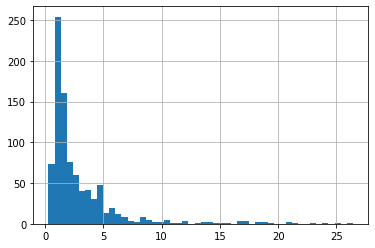

In [106]:
map_avg['CapRate'].hist(bins=50)
# cap rate 10% 이상은 잘못 계산된 것으로 판단

In [110]:
map_avg.describe()

,거래가격,임대료(만원),CapRate
count,8.950000e+02,895.000000,895.000000
mean,7.783330e+08,99.422093,2.921059
std,7.480502e+08,78.356939,3.406451
min,3.900000e+07,9.600000,0.279070
25%,2.500000e+08,61.051839,1.111750
50%,5.950000e+08,83.856061,1.663000
75%,1.050000e+09,111.100000,3.469333
max,9.450000e+09,1266.666667,26.400000


In [ ]:
# 공시지가랑 실거래가 맵핑해서 주소 데이터 붙이기
# 주소, 층수, 건물명으로 전월세 데이터 붙이기